In [1]:
import pandas as pd
import sys
import itertools
import os
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
from ppca import PPCA
from umap import UMAP


/home/cjensen/.cache/pypoetry/virtualenvs/topas-pipeline-KWgSVD8J-py3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# Do analysis again with corrected FP file  !!!

In [ ]:
# I don't see a big difference on PCA or UMAP when keeping occurrence threshold at 0.5.. we might have most of the filtering in the low occurrence area so I am also trying to run it on 0 filtering (takes a bit longer) but this also means more imputation to even do the pca/umap. 
# In general I got to think that PCA/UMAP is not the best tool to see improvement in this. I will try some more correlations intead. Not sure it's so easy to say if it's better though. So it's also a decision to take. 
# Or do you have some ideas how we could check that it is better? some problematic specific batches batch effects to see if that is solved?

In [ ]:
# Try first correlation plots!!!
# Then we could also try silhouette scores

# Idea for gs presentation.. if we decide to do this filter.. make scatter plot of # filtered data points vs intensity

# apart from that we want how much is filtered out (how does it translate to later - if done before some aggregation)
# how does correlations look after
# how does PCA look after

In [ ]:
# which options are there
# PP after summing across fractions + charge states
# PP before summing across fractions + charge states (not run yet)
# FP before protein grouping (running atm)
# FP after protein grouping (data is there but maybe wrong - find out)

In [ ]:
# For PP after summing across fractions + charge states

# let's look at the z-scores also.. recalculate also robust z-scores on this and make a umap/ppca

results_folder = Path('/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_study/2025.08.14_CJ_paper_cohort_robust_zscore_and_dr_filter')
results_folder_original = Path('/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_study/2025.08.06_CJ_paper_cohort_topas_v7_corrected_metadata')

# phospho_measures_z.tsv
# we can also do for z-scores but then use from subfolder

# 8 min to load
pp_after_summing = pd.read_csv(results_folder / 'preprocessed_pp.csv', index_col=['Modified sequence', 'Proteins', 'Gene names'])
pp_original = pd.read_csv(results_folder_original / 'preprocessed_pp.csv', index_col=['Modified sequence', 'Proteins', 'Gene names'])

# try with z-scores
# pp_after_summing = pd.read_csv(results_folder / 'preprocessed_pp.csv', index_col=['Modified sequence', 'Proteins', 'Gene names'], nrows=10000)
# pp_original = pd.read_csv(results_folder_original / 'preprocessed_pp.csv', index_col=['Modified sequence', 'Proteins', 'Gene names'], nrows=10000)


/tmp/ipykernel_371428/2113790385.py:11: DtypeWarning: Columns (2589,2590,2591,2592,2593,2594,2595,2596,2597,2598,2599,2600,2601,2602,2603,2604,2605,2606,2607,2608,2609,2610,2611,2612,2613,2614,2615,2616,2617,2618,2619,2620,2621,2622,2623,2624,2625,2626,2627,2628,2629,2630,2631,2632,2633,2634,2635,2636,2637,2638,2639,2640,2641,2642,2643,2644,2645,2646,2647,2648,2649,2650,2651,2652,2653,2654,2655,2656,2657,2658,2659,2660,2661,2662,2663,2664,2665,2666,2667,2668,2669,2670,2671,2672,2673,2674,2675,2676,2677,2678,2679,2680,2681,2682,2683,2684,2685,2686,2687,2688,2689,2690,2691,2692,2693,2694,2695,2696,2697,2698,2699,2700,2701,2702,2703,2704,2705,2706,2707,2708,2709,2710,2711,2712,2713,2714,2715,2716,2717,2718,2719,2720,2721,2722,2723,2724,2725,2726,2727,2728,2729,2730,2731,2732,2733,2734,2735,2736,2737,2738,2739,2740,2741,2742,2743,2744,2745,2746,2747,2748,2749,2750,2751,2752,2753,2754,2755,2756,2757,2758,2759,2760,2761,2762,2763,2764,2765,2766,2767,2768,2769,2770,2771,2772,2773,2774,2775,27

In [ ]:
print(pp_after_summing.isna().sum().sum())
print(pp_original.isna().sum().sum())
# 983842325
# 983483430


In [6]:
pp_after_summing = pp_after_summing.loc[:, ~pp_after_summing.columns.str.startswith('Identification')]
pp_after_summing = pp_after_summing.loc[:, ~pp_after_summing.columns.str.startswith('ref')]

pp_original = pp_original.loc[:, ~pp_original.columns.str.startswith('Identification')]
pp_original = pp_original.loc[:, ~pp_original.columns.str.startswith('ref')]

# 1 minutes to run
# correlation between columns of pp_after_summing and pp_original (they are in same order)
correlation = pp_after_summing.corrwith(pp_original)
correlation 

pat_I007-031-108742       1.0
pat_I043-005-95540        1.0
pat_I007-020-1007541      1.0
pat_I007-039-130734       1.0
pat_I043-001-80842        1.0
                         ... 
pat_H021-PB7R74-M2        1.0
pat_H021-7B4P26-M4-E2     1.0
pat_H021-73NDK9-M2        1.0
pat_H021-US9CZJ-M1        1.0
pat_K26K-XZXC1V-M11-E3    1.0
Length: 1998, dtype: float64

Text(0.5, 1.0, 'Scatter plot of PP after summing and original for sample 1')

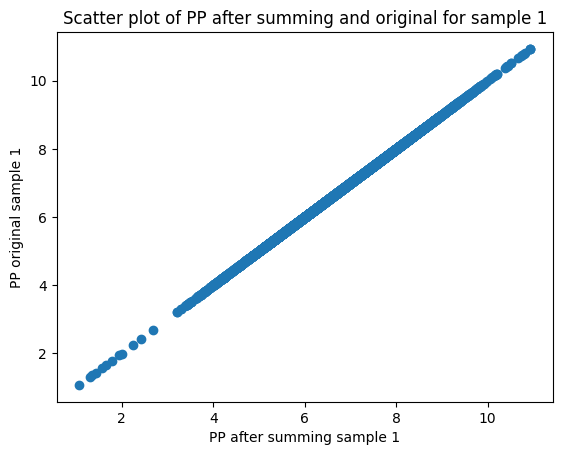

In [ ]:
# investigate more? scatter plots?

# sort and scatter plot of those with worst correlation?

# scatter plot of sample 1 and 1 in pp_after_summing and pp_original
# plt.scatter(pp_after_summing.iloc[:, 0], pp_original.iloc[:, 0])
# plt.xlabel('PP after summing sample 1')
# plt.ylabel('PP original sample 1')
# plt.title('Scatter plot of PP after summing and original for sample 1')


In [25]:
# wont work here because it is just some missing values

# we can look at how many missing values per patient

# diff = pp_after_summing.isna().sum()-pp_original.isna().sum()
# diff.hist()
# # add title
# plt.title('Difference in missing values between PP filter after summing and original')
# plt.xlabel('Difference in missing values')
# plt.ylabel('Frequency')
# plt.show()

# get number of genes per sample

# Example: reset index so "Gene names" is a column
# pp_after_summing = pp_after_summing.reset_index()
# drop the index column
# pp_after_summing = pp_after_summing.drop(columns=['index'])
# pp_original = pp_original.reset_index()

#
ignore_cols = ["Gene names", "Modified sequence", "Proteins"]

filter_counts_per_patient = {
    patient: pp_after_summing.loc[pp_after_summing[patient].notna(), "Gene names"].nunique()
    for patient in pp_after_summing.columns if patient not in ignore_cols
}

original_counts_per_patient = {
    patient: pp_original.loc[pp_original[patient].notna(), "Gene names"].nunique()
    for patient in pp_original.columns if patient not in ignore_cols
}

filter_counts_per_patient = pd.Series(filter_counts_per_patient, name="Num_Genes")
original_counts_per_patient = pd.Series(original_counts_per_patient, name="Num_Genes")

print(filter_counts_per_patient)
print(original_counts_per_patient)

pat_I007-031-108742       6420
pat_I043-005-95540        6413
pat_I007-020-1007541      6419
pat_I007-039-130734       6434
pat_I043-001-80842        6435
                          ... 
pat_H021-PB7R74-M2        6045
pat_H021-7B4P26-M4-E2     6051
pat_H021-73NDK9-M2        6049
pat_H021-US9CZJ-M1        6077
pat_K26K-XZXC1V-M11-E3    6011
Name: Num_Genes, Length: 1998, dtype: int64
pat_I007-031-108742       6446
pat_I043-005-95540        6446
pat_I007-020-1007541      6446
pat_I007-039-130734       6446
pat_I043-001-80842        6446
                          ... 
pat_H021-PB7R74-M2        6099
pat_H021-7B4P26-M4-E2     6099
pat_H021-73NDK9-M2        6099
pat_H021-US9CZJ-M1        6099
pat_K26K-XZXC1V-M11-E3    6071
Name: Num_Genes, Length: 1998, dtype: int64


Text(0.5, 1.0, 'Scatter plot of filtered PP after summing and original PP before filtering')

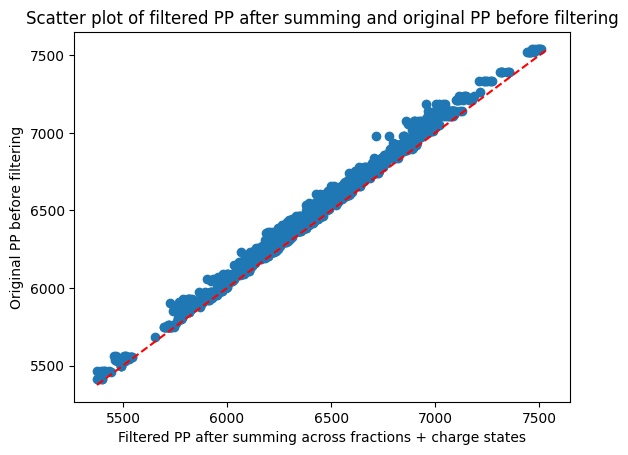

In [29]:
# scatter plot of filter_counts_per_patient and original_counts_per_patient
plt.scatter(filter_counts_per_patient, original_counts_per_patient)
plt.plot([min(filter_counts_per_patient.min(), original_counts_per_patient.min()), max(filter_counts_per_patient.max(), original_counts_per_patient.max())],
         [min(filter_counts_per_patient.min(), original_counts_per_patient.min()), max(filter_counts_per_patient.max(), original_counts_per_patient.max())], color='red', linestyle='--')
plt.xlabel('Filtered PP after summing across fractions + charge states')
plt.ylabel('Original PP before filtering')
plt.title('Scatter plot of filtered PP after summing and original PP before filtering')

In [ ]:
diff

# most removed is for this pat_K26K-DRLREE-M11-Q1


pat_I007-031-108742       228
pat_I043-005-95540        346
pat_I007-020-1007541      158
pat_I007-039-130734        91
pat_I043-001-80842         80
                         ... 
pat_H021-PB7R74-M2        391
pat_H021-7B4P26-M4-E2     298
pat_H021-73NDK9-M2        330
pat_H021-US9CZJ-M1        149
pat_K26K-XZXC1V-M11-E3    328
Length: 1998, dtype: int64

In [42]:
# diff = pp_after_summing.isna().sum(1)-pp_original.isna().sum(1)
# diff.hist()

# plt.title('Difference in missing values between PP filter after summing and original')
# plt.xlabel('Difference in missing values')
# plt.ylabel('Frequency')
# plt.show()

# ignore_cols = ["Gene names", "Modified sequence", "Proteins"]

# Use "Modified sequence" as index
pp_after_summing_pep = pp_after_summing.set_index(["Gene names", "Modified sequence", "Proteins"])
pp_original_pep = pp_original.set_index(["Gene names", "Modified sequence", "Proteins"])

# For each peptide (row), count in how many patients it is observed (non-NaN)
filter_counts_per_peptide = (
    pp_after_summing_pep.drop(columns=ignore_cols, errors="ignore")
    .notna()
    .sum(axis=1)
)

original_counts_per_peptide = (
    pp_original_pep.drop(columns=ignore_cols, errors="ignore")
    .notna()
    .sum(axis=1)
)

# Wrap into Series with peptide index
filter_counts_per_peptide = pd.Series(filter_counts_per_peptide, name="Num_Patients")
original_counts_per_peptide = pd.Series(original_counts_per_peptide, name="Num_Patients")

print(filter_counts_per_peptide)
print(original_counts_per_peptide)

Gene names  Modified sequence                                                   Proteins                                              
EIF3J       _(Acetyl (Protein N-term))AAAAAAAGDpSDSWDADAFSVEDPVRK_              O75822;O75822-2;O75822-3                                  677
MECP2       _(Acetyl (Protein N-term))AAAAAAAPSGGGGGGEEERLEEKpSEDQDLQGLK_       B5MCB4;P51608-2                                           304
FOXK2       _(Acetyl (Protein N-term))AAAAAALSGAGTPPAGGGAGGGGAGGGGpSPPGGWAVAR_  Q01167;Q01167-2;Q01167-3                                  172
AEBP2       _(Acetyl (Protein N-term))AAAITDMADLEELSRLpSPLPPGSPGSAAR_           Q6ZN18;Q6ZN18-2                                            70
TRAF2       _(Acetyl (Protein N-term))AAASVTPPGpSLELLQPGFSK_                    B1AMX7;B1AMX8;B1AMY1;Q12933;Q12933-2;Q12933-3;Q12933-4    471
                                                                                                                                         ... 
ITSN2       _

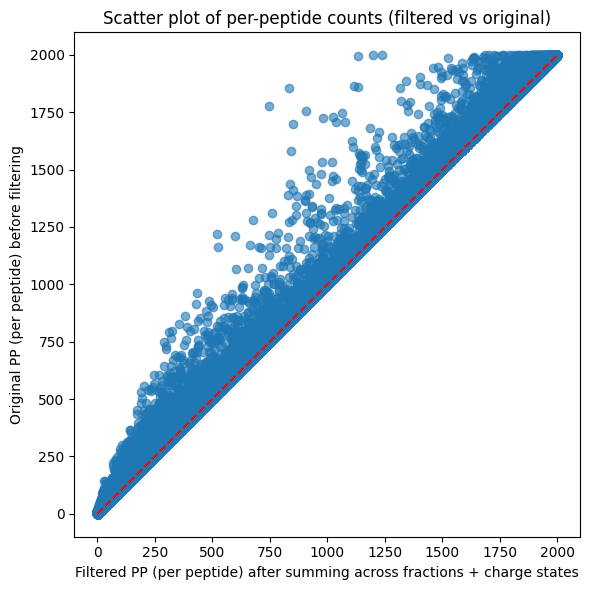

In [34]:

plt.figure(figsize=(6,6))

# Scatter plot of per-peptide counts
plt.scatter(filter_counts_per_peptide, original_counts_per_peptide, alpha=0.6)

# Diagonal reference line
min_val = min(filter_counts_per_peptide.min(), original_counts_per_peptide.min())
max_val = max(filter_counts_per_peptide.max(), original_counts_per_peptide.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

plt.xlabel('Filtered PP (per peptide) after summing across fractions + charge states')
plt.ylabel('Original PP (per peptide) before filtering')
plt.title('Scatter plot of per-peptide counts (filtered vs original)')
plt.tight_layout()
plt.show()


In [ ]:
diff = filter_counts_per_peptide - original_counts_per_peptide
diff = diff.reset_index().sort_values(by='Num_Patients', ascending=False)
diff.to_csv(results_folder / 'diff_counts_per_peptide.csv', index=False)

,Gene names,Modified sequence,Proteins,Num_Patients
205681,ARHGEF12,_pYpTEWPpTER_,E9PMR6;Q9NZN5;Q9NZN5-2,0
205663,MAP1A,_YLPGAITSPDEHILpTPDSSFpSKSPESLPGPALEDIAIK_,E9PGC8;P78559;P78559-2,0
205662,THBS4,_YHPCYPGVHCINLpSPGFR_,E7ES19;P35443,0
205661,SKAP2,_YDKDDEAPpSDGAQFPPIAAQDLPFVLK_,C9JQ17;O75563,0
205660,FN1,_WLPSpSSPVTGYR_,H0Y7Z1;P02751;P02751-1;P02751-10;P02751-11;P02...,0
...,...,...,...,...
26405,TTN,_VKpSPEPR_,A0A0A0MRA3;A0A0A0MTS7;Q8WZ42;Q8WZ42-10;Q8WZ42-...,-848
488,CXorf49,_(Acetyl (Protein N-term))pSSPDKVSVCGAGFDLEGGK_,A8MYA2,-849
9855,ALPG;ALPP,_HVPDpSGATATAYLCGVK_,P05187;P10696,-861
22569,KIAA1549L,_SRSPSENGSVISNEpSGK_,A0A590UJI0;H0YDE5;Q6ZVL6,-1024


In [ ]:
# profile batch effects of EGFR



In [4]:
sample_annotation = pd.read_csv(Path(results_folder) / "sample_annot_filtered.csv")
sample_annotation = sample_annotation.set_index('Sample name')

In [ ]:
# OBS maybe try comparison somehow where i load one column from the file at a time

# after grouping seems wrong because preprocessed_fp2.csv is bigger than original.. 
# cannot say for sure but also correlations are ALL 1 - expected
# before grouping was run incorrectly so it is being rerun..

In [3]:
# Load the data of fp removal before grouping

results_folder = Path('/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_study/2025.08.14_CJ_paper_cohort_robust_zscore_and_dr_filter')
results_folder_original = Path('/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_study/2025.08.06_CJ_paper_cohort_topas_v7_corrected_metadata')

# fp_before_grouping = pd.read_csv(results_folder / 'preprocessed_fp.csv', index_col='Gene names')
fp_after_grouping = pd.read_csv(results_folder / 'filter_at_protein_level' / 'preprocessed_fp.csv', index_col='Gene names')  
fp_original = pd.read_csv(results_folder_original / 'preprocessed_fp.csv', index_col='Gene names')

# Remove columns starting with Identification
# fp_before_grouping = fp_before_grouping.loc[:, ~fp_before_grouping.columns.str.startswith('Identification')]
fp_after_grouping = fp_after_grouping.loc[:, ~fp_after_grouping.columns.str.startswith('Identification')]
fp_original = fp_original.loc[:, ~fp_original.columns.str.startswith('Identification')]
# remove columns starting with ref
# fp_before_grouping = fp_before_grouping.loc[:, ~fp_before_grouping.columns.str.startswith('ref')]
fp_after_grouping = fp_after_grouping.loc[:, ~fp_after_grouping.columns.str.startswith('ref')]
fp_original = fp_original.loc[:, ~fp_original.columns.str.startswith('ref')]

/tmp/ipykernel_634994/3319044123.py:7: DtypeWarning: Columns (2688,2689,2690,2691,2692,2771,2772,2773,2774,2775,2776,2777,2778,2779,2780,2781,2782,2783,2804,2805,2806,2807,2808,2809,2810,2917,2918,2919,2986,2987,2988,2989,2990,2991,3024,3025,3026,3027,3028,3029,3100,3101,3102,3103,3104,3185,3186,3187,3188,3189,3190,3197,3198,3199,3200,3201,3202,3203,3204,3255,3256,3257,3258,3259,3260,3261,3356,3357,3358,3359,3360,3555,3556,3557,3558,3559,3560,3561,3562,3563,3564,3565,3598,3599,3600,3601,3602,3603,3604,3705,3706,3707,3708,3709,3710,3711,3712,3713,3723,3724,3725,3726,3727,3728,3729,3730,3731,3818,3819,3820,3821,3822,3823,3824,3825,3835,3836,3837,3838,3839,3840,3841,3862,3863,3864,3865,3866,3867,3868,3869,3992,3993,3994,3995,3996,3997,3998,3999,4007,4008,4009,4010,4011,4012,4013,4014,4015,4016,4017,4018,4019,4020,4021,4022,4023,4024,4025,4026,4027,4028,4029,4030,4034,4035,4036,4037,4038,4039,4040,4041,4218,4219,4220,4221,4222,4223,4224,4225,4273,4274,4275,4276,4277,4278,4279,4297,4298,429

In [18]:
# Sanity checks
# print(fp_before_grouping.shape)
print(fp_after_grouping.shape)
print(fp_original.shape)
# Sparsity of dfs
# print(fp_before_grouping.isna().sum().sum())  # it was wrong!!!
print(fp_after_grouping.isna().sum().sum())   # Different but we expect this (much larger)
print(fp_original.isna().sum().sum())  # Not different but we also kind of expect this


# pat_cols = [col for col in df.columns if "Reporter" in col]
# metadata_cols = [col for col in df.columns if "Metadata" in col]

# # check sparsity between the two dataframes
sparsity_original = fp_original.isna().mean().mean()
sparsity_new = fp_after_grouping.isna().mean().mean()
print(f"Sparsity of original dataframe: {sparsity_original:.2%}")
print(f"Sparsity of new dataframe: {sparsity_new:.2%}")

# # count all na in both dataframes
na_count_original = fp_original.isna().sum().sum()
na_count_new = fp_after_grouping.isna().sum().sum()
print(f"Number of NaN values in original dataframe: {na_count_original}")
print(f"Number of NaN values in new dataframe: {na_count_new}")

total_counts_original = fp_original.notna().sum().sum()
print(f"Total counts in original dataframe: {total_counts_original}")
# percentage less in new dataframe
total_counts_new = fp_after_grouping.notna().sum().sum()
print(f"Total counts in new dataframe: {total_counts_new}")
percentage_less = (total_counts_original - total_counts_new) / total_counts_original * 100
print(f"Percentage of counts less in new dataframe: {percentage_less:.2f}%")

(13069, 1998)
(13069, 1998)
9694223
9427710
Sparsity of original dataframe: 36.11%
Sparsity of new dataframe: 37.13%
Number of NaN values in original dataframe: 9427710
Number of NaN values in new dataframe: 9694223
Total counts in original dataframe: 16684152
Total counts in new dataframe: 16417639
Percentage of counts less in new dataframe: 1.60%


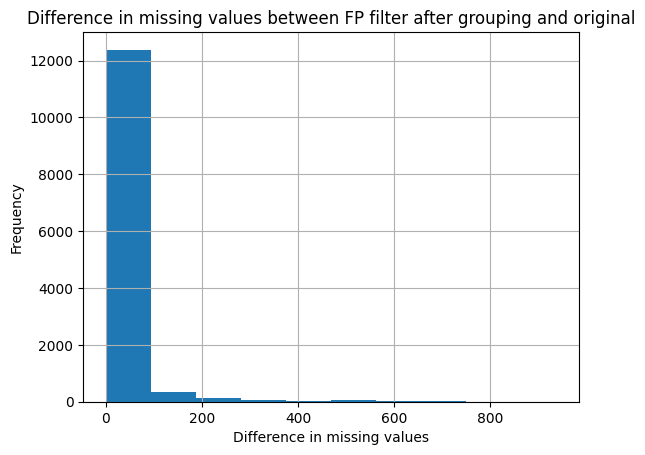

In [9]:

# diff = fp_after_grouping.isna().sum()-fp_original.isna().sum()
# diff.hist()
# # add title
# plt.title('Difference in missing values between FP filter after grouping and original')
# plt.xlabel('Difference in missing values')
# plt.ylabel('Frequency')
# plt.show()

diff = fp_after_grouping.isna().sum(1)-fp_original.isna().sum(1)
diff.hist()
# add title
plt.title('Difference in missing values between FP filter after grouping and original')
plt.xlabel('Difference in missing values')
plt.ylabel('Frequency')
plt.show()


In [10]:
fp_after_grouping.head()

,pat_I007-031-108742,pat_I043-005-95540,pat_I007-020-1007541,pat_I007-039-130734,pat_I043-001-80842,pat_I043-005-130270,pat_H021-7AAYWW-T1,pat_H021-7AAYWW-T2,pat_H021-ENQC15-T1,pat_H021-ENQC15-T3,...,pat_H021-4E7TY38-M2-E3-R2,pat_H021-UX97WMF-M2,pat_H021-Y86W2S-M4,pat_H021-XC9MD6-M1-E2,pat_K26K-UP59X5-M11-E1,pat_H021-PB7R74-M2,pat_H021-7B4P26-M4-E2,pat_H021-73NDK9-M2,pat_H021-US9CZJ-M1,pat_K26K-XZXC1V-M11-E3
Gene names,,,,,,,,,,,,,,,,,,,,,
SYMPK,8.18092,8.69479,8.06539,8.15797,8.53703,8.48202,8.57228,8.50176,8.28851,8.48824,...,8.28409,8.28622,8.10762,8.44522,8.46713,8.37147,8.35046,8.29450,8.44633,8.36025
NUP160,8.31544,8.77694,8.28701,8.35071,8.60482,8.64277,8.68815,8.62136,8.73661,8.68912,...,8.42141,8.32725,8.21675,8.61655,8.47567,8.42317,8.42473,8.38633,8.42517,8.55023
FARP1,8.38496,8.54319,8.47106,8.43023,8.52567,8.40012,9.11571,8.77029,8.05848,8.12399,...,8.08415,8.82306,8.09942,8.69197,8.28030,8.30635,8.23706,8.61866,8.35417,8.37409
UPF1,8.95921,9.05346,8.94982,8.91811,8.99001,8.96168,9.13025,8.97350,9.22703,9.16149,...,8.85474,8.93956,8.92287,8.94352,8.94947,9.03589,8.96601,9.00260,9.03787,9.17271
IGBP1,8.12729,7.89114,8.15998,8.08254,7.91376,7.88251,7.93719,8.02890,8.25383,8.26203,...,7.91925,7.76406,7.97692,8.08025,7.82743,7.90897,7.89459,8.03658,8.03645,7.77446


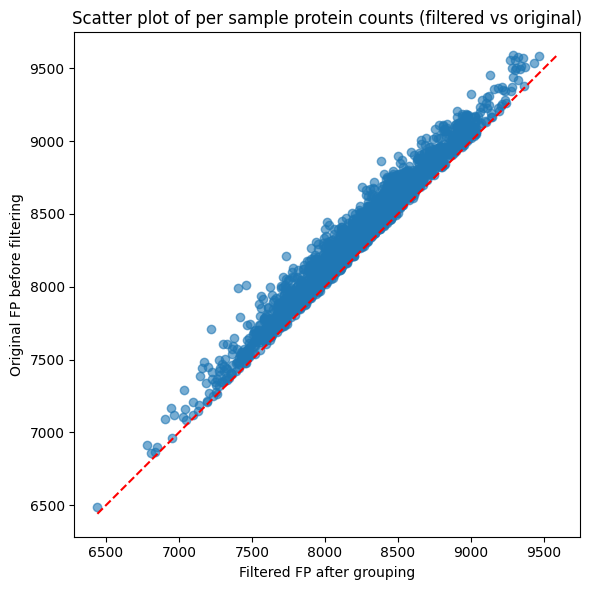

In [14]:
filter_counts = (
    fp_after_grouping.notna()
    .sum()
)

original_counts = (
    fp_original.notna()
    .sum()
)

# Wrap into Series with peptide index
filter_counts = pd.Series(filter_counts, name="Num_Patients")
original_counts = pd.Series(original_counts, name="Num_Patients")

# print(filter_counts)
# print(original_counts)

plt.figure(figsize=(6,6))

# Scatter plot of per-peptide counts
plt.scatter(filter_counts, original_counts, alpha=0.6)

# Diagonal reference line
min_val = min(filter_counts.min(), original_counts.min())
max_val = max(filter_counts.max(), original_counts.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

plt.xlabel('Filtered FP after grouping')
plt.ylabel('Original FP before filtering')
plt.title('Scatter plot of per sample protein counts (filtered vs original)')
plt.tight_layout()
plt.show()

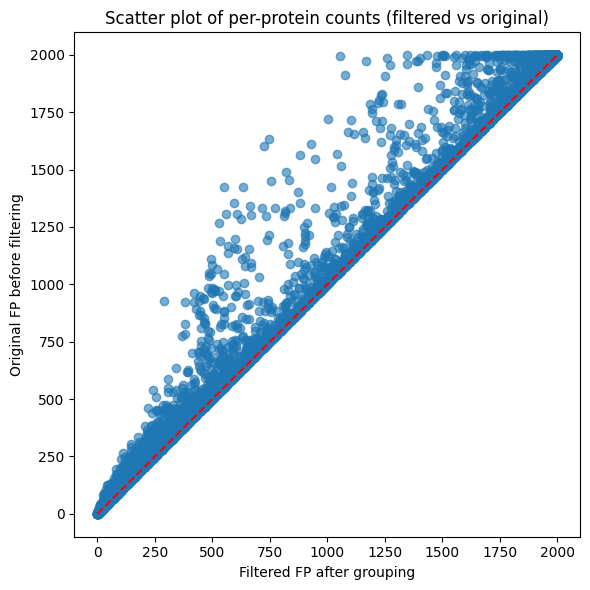

In [7]:


# For each peptide (row), count in how many patients it is observed (non-NaN)
filter_counts_per_peptide = (
    fp_after_grouping.notna()
    .sum(axis=1)
)

original_counts_per_peptide = (
    fp_original.notna()
    .sum(axis=1)
)

# Wrap into Series with peptide index
filter_counts_per_peptide = pd.Series(filter_counts_per_peptide, name="Num_Patients")
original_counts_per_peptide = pd.Series(original_counts_per_peptide, name="Num_Patients")

plt.figure(figsize=(6,6))

# Scatter plot of per-peptide counts
plt.scatter(filter_counts_per_peptide, original_counts_per_peptide, alpha=0.6)

# Diagonal reference line
min_val = min(filter_counts_per_peptide.min(), original_counts_per_peptide.min())
max_val = max(filter_counts_per_peptide.max(), original_counts_per_peptide.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

plt.xlabel('Filtered FP after grouping')
plt.ylabel('Original FP before filtering')
plt.title('Scatter plot of per-protein counts (filtered vs original)')
plt.tight_layout()
plt.show()

In [8]:

diff = fp_after_grouping.isna().sum(1)-fp_original.isna().sum(1)
diff = diff.sort_values(ascending=False)
diff.to_csv(results_folder / 'filter_at_protein_level' /'diff_counts_per_protein.csv')

In [ ]:
#  1) PCA/UMAP

#  2) Diff plots

#  3) Batch effect plots at batch level


In [ ]:
# makes no sense that EGFR diff is 1998??
fp_after_grouping.loc['EGFR', :]

# wtf 

pat_I007-031-108742      NaN
pat_I043-005-95540       NaN
pat_I007-020-1007541     NaN
pat_I007-039-130734      NaN
pat_I043-001-80842       NaN
                          ..
pat_H021-PB7R74-M2       NaN
pat_H021-7B4P26-M4-E2    NaN
pat_H021-73NDK9-M2       NaN
pat_H021-US9CZJ-M1       NaN
pat_K26K-XZXC1V-M11-E3   NaN
Name: EGFR, Length: 1998, dtype: float64

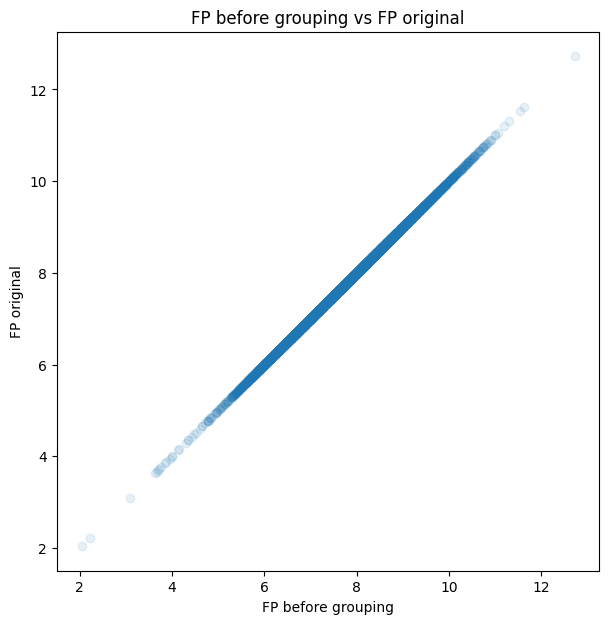

In [ ]:
# # Compare correlations between the different dataframes
# correlation_after_original = fp_after_grouping.corrwith(fp_original, axis=0)
# correlation_after_original

# # is there a non 1 anywhere in the corr



# # # scatter plot of before and after grouping
# plt.figure(figsize=(7, 7))
# plt.scatter(fp_after_grouping.loc[:, 'pat_K26K-DUL4HS-M22-Q1'], fp_original.loc[:, 'pat_K26K-DUL4HS-M22-Q1'], alpha=0.1)
# plt.xlabel('FP before grouping')
# plt.ylabel('FP original')
# plt.title('FP before grouping vs FP original')
# plt.show()


In [6]:
test = pd.concat([fp_before_grouping.loc[:, 'pat_K26K-DUL4HS-M22-Q1'], fp_original.loc[:, 'pat_K26K-DUL4HS-M22-Q1']], axis=1)
# test.iloc[:, 0] == test.iloc[:, 1]  # This should be true for all rows if they are the same

# # # take subset where False of test.iloc[:, 0] == test.iloc[:, 1]
test_false = test[test.iloc[:, 0] != test.iloc[:, 1]]
test_false

# # test.loc['CYP11B1', :]


,pat_K26K-DUL4HS-M22-Q1,pat_K26K-DUL4HS-M22-Q1
Gene names,,
OBSCN,NaN,NaN
CEACAM5,NaN,NaN
MYH1,NaN,NaN
STAB2,NaN,NaN
LAMA3,NaN,NaN
...,...,...
CSF3R,NaN,NaN
MSANTD3,NaN,NaN
SLITRK3,NaN,NaN


In [75]:
# df_test = pd.read_csv(results_folder / 'filter_at_protein_level' / 'preprocessed_fp2.csv', index_col='Gene names')
# drop columns starting with Identification
# df_test = df_test.loc[:, ~df_test.columns.str.startswith('Identification')]
# df_test = df_test.loc[:, ~df_test.columns.str.startswith('ref')]

df_test.loc[df_test.index.str.contains('EGFR'), :]

,Reporter intensity corrected 1 Sarcoma_Batch1,Reporter intensity corrected 1 Sarcoma_Batch10,Reporter intensity corrected 1 Sarcoma_Batch100,Reporter intensity corrected 1 Sarcoma_Batch101,Reporter intensity corrected 1 Sarcoma_Batch102,Reporter intensity corrected 1 Sarcoma_Batch103,Reporter intensity corrected 1 Sarcoma_Batch105,Reporter intensity corrected 1 Sarcoma_Batch106,Reporter intensity corrected 1 Sarcoma_Batch107,Reporter intensity corrected 1 Sarcoma_Batch108,...,Reporter intensity corrected 9 Sarcoma_Batch9,Reporter intensity corrected 9 Sarcoma_Batch90,Reporter intensity corrected 9 Sarcoma_Batch91,Reporter intensity corrected 9 Sarcoma_Batch93,Reporter intensity corrected 9 Sarcoma_Batch94,Reporter intensity corrected 9 Sarcoma_Batch95,Reporter intensity corrected 9 Sarcoma_Batch96,Reporter intensity corrected 9 Sarcoma_Batch97,Reporter intensity corrected 9 Sarcoma_Batch98,Reporter intensity corrected 9 Sarcoma_Batch99
Gene names,,,,,,,,,,,,,,,,,,,,,
EGFR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
